# Module 2.5: Drug Dosage
While the common subject for this module is drug dosage, we will use this module to introduce inputs into the system which are time varying and multicompartment models.  The general differential equation for these situations is still $\frac{dQ}{dt}=-KQ$ in which $Q$ is the amount of drug.  This will change slightly if we are considering the flow or rate to be dependent on a concentration difference.  Note that in general, the concentration is $c=\frac{Q}{V}$ for volumetric concentration or $c=\frac{Q}{M}$ for mass concentration.

<h2>Initialization</h2>
<p>This section contains initialization code which gives this notebook the resources it needs to run<p>

In [1]:
#This code performs the necessary steps to prepare to plot.
from matplotlib import pyplot
from math import *
    
#Set the default plot to be inline rather than a new window.
%matplotlib inline

import inspect  #This allows us to print the source code in this notebook.
from SDExamples import *  #Import the custom functions from this project.

goldenratio=1/2*(1+sqrt(5))        #The next few lines are used for the size of plots
fsx=7                              #Width (in inches) for the figures.
fsy=fsx/goldenratio                #Height (in inches) for the figures.

In [2]:
sqrt(5)

2.23606797749979

## Multiple Drug Doses Code
We now find the blood stream concenctration for a drug with multiple doses taken at a specified interval.  In this model we will consider the drug to be completely absorbed into the body in a single instance, and we will consider the body as a single compartment.

The code for this model is below.

The code 

    if t % interval < dt:
        drug_in_system += alpha * dose
        
adds an impulse of drug to the system of magnitude `alpha * dose` with `interval` time between impulses.  The `t % interval` is modulus division.  It returns the remainder of $\frac{t}{interval}$.  If this remainder is less than dt, then it is the proper time add another drug impulse as the time is as close to $n \cdot interval$ (with $n$ an integer) as it will get.

In [3]:
print(inspect.getsource(multiple_dose_drug))

def multiple_dose_drug(dt, timemax, dose, interval, halflife, alpha):
    """Calculates blood concentration for multiple dose Dilantin as described in the text"""

    EliminationConstant = - math.log(0.5)/halflife
    drug_in_system = 0
    t = 0
    t_array = [t]
    drug_in_system_array = [drug_in_system]

    while t < timemax:
        if t % interval < dt:                         #if remainder of t/interval is smaller than dt then
            drug_in_system += alpha * dose                #add impulse of drug to system.
        drug_in_system -= EliminationConstant * drug_in_system * dt
        t += dt
        t_array.append(t)
        drug_in_system_array.append(drug_in_system)

    return t_array, drug_in_system_array



## Problem Definition and Solution
The problem is fully defined in the text which gives the constants defined below.  The function `multiple_dose_drug` returns the drug in system.  We want to plot the drug concentration so divide each element of the drug in system list by the blood volume to get the concentration. 

In [4]:
Δt = 0.1; SimulationTime = 200; Dose=100*1000;    #Drug dosage in mg.
DrugHalfLife=22                                   #Drug half life in hours.
AbsorptionConstant = 0.12                         #Percentage of the drug dose absorbed into the blood.
DoseInterval = 8                                  #Time between doses.

dtime, dis = multiple_dose_drug(Δt,SimulationTime, Dose, DoseInterval, DrugHalfLife, AbsorptionConstant)
BloodVolume=3000
DCon = [d/BloodVolume for d in dis]

In [5]:
SimulationTime

200

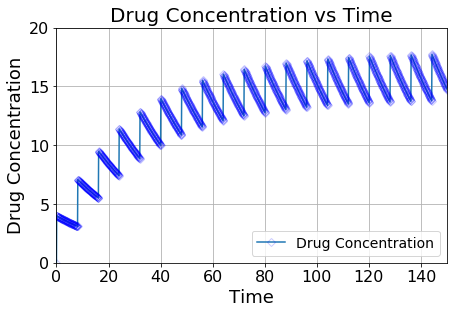

In [6]:
MyFigure, MyAxes = pyplot.subplots(1, 1);
MyAxes.plot(dtime, DCon, 'D-', MFC=(1,0,0,0),mec=(0, 0, 1, 0.2),label = 'Drug Concentration');
MyAxes.set_xlabel('Time');
MyAxes.set_ylabel('Drug Concentration');
MyAxes.set_title('Drug Concentration vs Time');
MyAxes.set_xlim((0,150));
MyAxes.set_ylim((0,20));
format_plot(MyAxes)
MyAxes.legend(loc='lower right',fontsize=14);

<p>The figure above is identical to figure 2.5.4 from the text.  We now know we have a good base simulation running.  We will now work to extend it.</p>

In [7]:
MyFigure.savefig('Module_2_5_Figure.png',dpi=400)